<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/CNNmoney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/money/train/'

photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('001'):
    output = 1.0
  if file.startswith('002'):
    output = 2.0
  if file.startswith('005'):
    output = 3.0
  if file.startswith('010'):
    output = 4.0
  if file.startswith('020'):
    output = 5.0
  if file.startswith('050'):
    output = 6.0
  if file.startswith('100'):
    output = 7.0
  if file.startswith('200'):
    output = 8.0
  if file.startswith('500'):
    output = 9.0
  photo = load_img(folder + file, target_size = (100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Colab Notebooks/photos3.npy',photos_train)
save('/content/drive/MyDrive/Colab Notebooks/labels3.npy',labels_train)

class_name = {1: '1.000',2: '2.000',3: '5.000',4: '10.000',5: '20.000',
              6: '50.000',7: '100.000',8:'200.000',9:'500.000'}

(135, 100, 100, 3) (135,)


In [5]:
folder = '/content/drive/MyDrive/money/test/'

photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('001'):
    output = 1.0
  if file.startswith('002'):
    output = 2.0
  if file.startswith('005'):
    output = 3.0
  if file.startswith('010'):
    output = 4.0
  if file.startswith('020'):
    output = 5.0
  if file.startswith('050'):
    output = 6.0
  if file.startswith('100'):
    output = 7.0
  if file.startswith('200'):
    output = 8.0
  if file.startswith('500'):
    output = 9.0
  photo = load_img(folder + file, target_size = (100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/anhlop_test/photos3.npy',photos_test)
save('/content/drive/MyDrive/anhlop_test/labels3.npy',labels_test)

(18, 100, 100, 3) (18,)


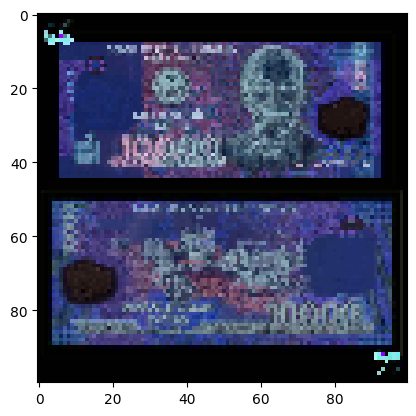

In [6]:
import matplotlib.pyplot as plt
import numpy as np
img = photos_train[55]
plt.imshow((img*255).astype(np.uint8))
plt.show()

In [7]:
photos_train = photos_train.reshape(135, 100, 100, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(18, 100, 100, 3)
photos_test = photos_test.astype('float32')/255

from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((135, 100, 100, 3), (135, 10), (18, 100, 100, 3), (18, 10))

In [10]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 128
epochs = 40
classes = 10


model = Sequential()
#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (100,100,3), padding = 'same')) 
# nhan tich chap 32 lan
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))

In [11]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size , 
                  epochs = epochs, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

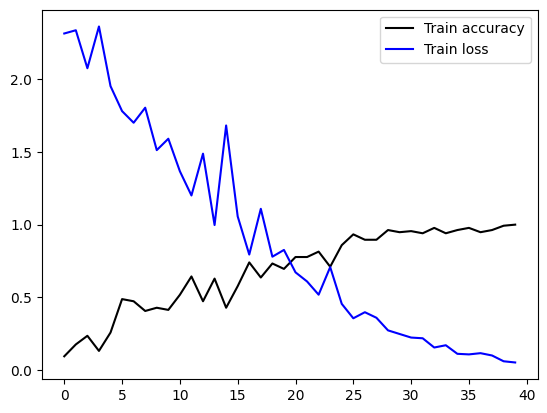

In [12]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [13]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelmoney.h5')

1/1 [==============================] - 0s 30ms/step
Predicted:  5.000


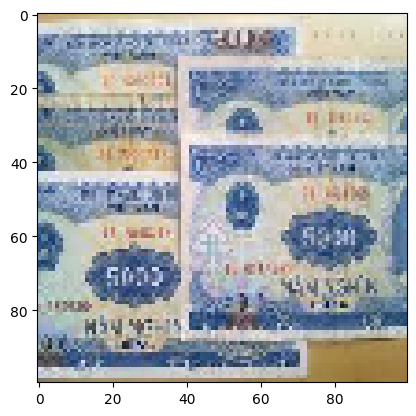

In [15]:
#test
filePath = '/content/drive/MyDrive/money/test/005_17.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(100,100))
arrayImage = img_to_array(testImage).reshape(1,100,100,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 47ms/step
Predicted:  20.000


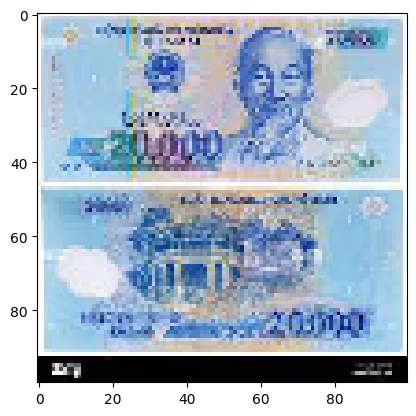

In [18]:
#test
filePath = '/content/drive/MyDrive/money/test/020_16.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(100,100))
arrayImage = img_to_array(testImage).reshape(1,100,100,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)